In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, KFold

In [2]:
X, y = load_iris(return_X_y= True, as_frame = True)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
model = KMeans(n_clusters=3, random_state=42)

In [5]:
param_dist = {
    'tol' : [1e-6, 1e-7, 1e-8],
    'n_init' : [10, 15, 20],
    'max_iter' : [1000, 1500, 2000],
    'algorithm' : ['lloyd', 'elkan']
}

In [6]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=200, cv=cv,
    scoring='homogeneity_score', random_state=42)

In [7]:
search = random_search.fit(X_scaled)
model.set_params(**search.best_params_).fit(X_scaled)
print(search.best_params_)

c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 54 is smaller than n_iter=200. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The sco

{'tol': 1e-06, 'n_init': 10, 'max_iter': 1000, 'algorithm': 'lloyd'}


c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\stefano\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 969, in _score
    scores

In [8]:
labels = model.labels_
centroids = model.cluster_centers_ 


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)
y_pca = pca.transform(y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

NameError: name 'centroids_pca' is not defined

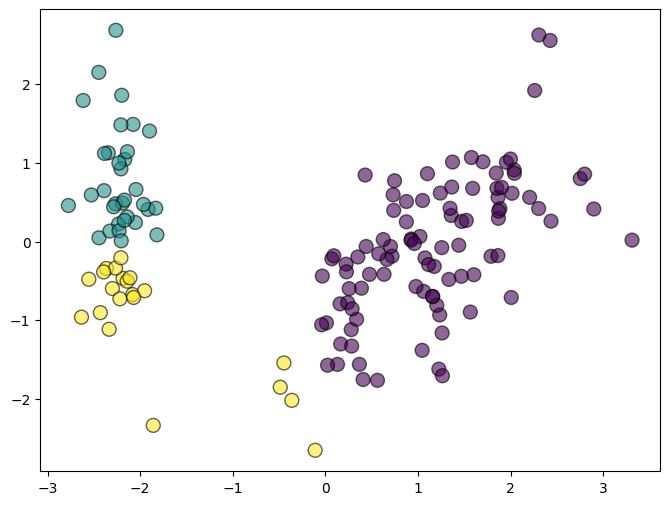

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=100, edgecolors='k', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='o', label='Centroidi')

plt.title('Clustering K-Means sul dataset Iris (con PCA per 2D)')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.grid(True)
plt.show()


C:\Users\stefano\AppData\Local\Temp\ipykernel_10700\2272169059.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


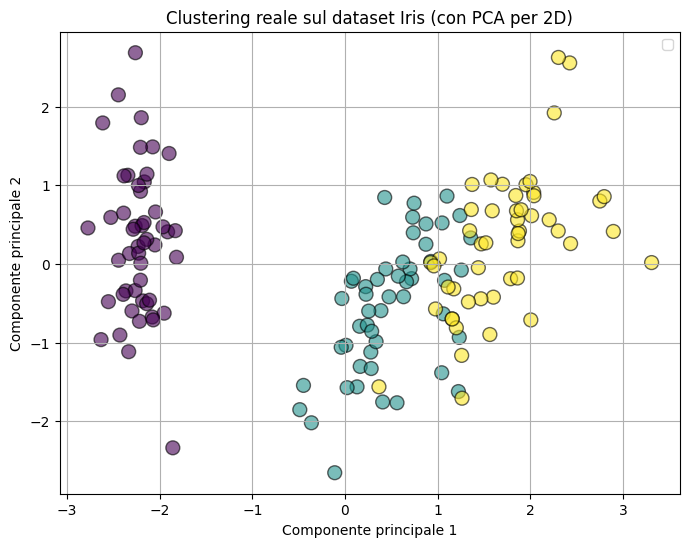

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o', s=100, edgecolors='k', alpha=0.6)

plt.title('Clustering reale sul dataset Iris (con PCA per 2D)')
plt.xlabel('Componente principale 1')
plt.ylabel('Componente principale 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
omo = homogeneity_score(y, labels)
print("homogeneity_score: ", omo)

ars = adjusted_rand_score(y, labels)
print("adjusted_rand_score: ", ars)


homogeneity_score:  0.534661805863406
adjusted_rand_score:  0.432804702527474
